In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.PlotDriver import CPlotDriver


In [8]:
code = "NVDA"
#begin_time = "2024-09-25"
begin_time = "2025-06-01"
#end_time = "2025-04-01"
end_time = None
data_src = DATA_SRC.YAHOO_FINANCE
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_60M, KL_TYPE.K_30M]

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": True,
    "min_zs_cnt": 0,
    "bs1_peak": True,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})


In [9]:
plot_config = {
    "plot_kline": True,
    "plot_kline_combine": False,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": True,
    "plot_dmi": False,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    "plot_extrainfo": False,
    "plot_demark": False,
    "plot_marker": False,
    "plot_rsi": False,
    "plot_kdj": False,
    "plot_rsl": False,
    "plot_demand_index": False,
    "plot_adline": False,
    "plot_bollinger_bands": False,
    "plot_keltner_channel": False,
    "plot_starc": False,
}

plot_para = {
    "figure": {"x_range": 100000},
}


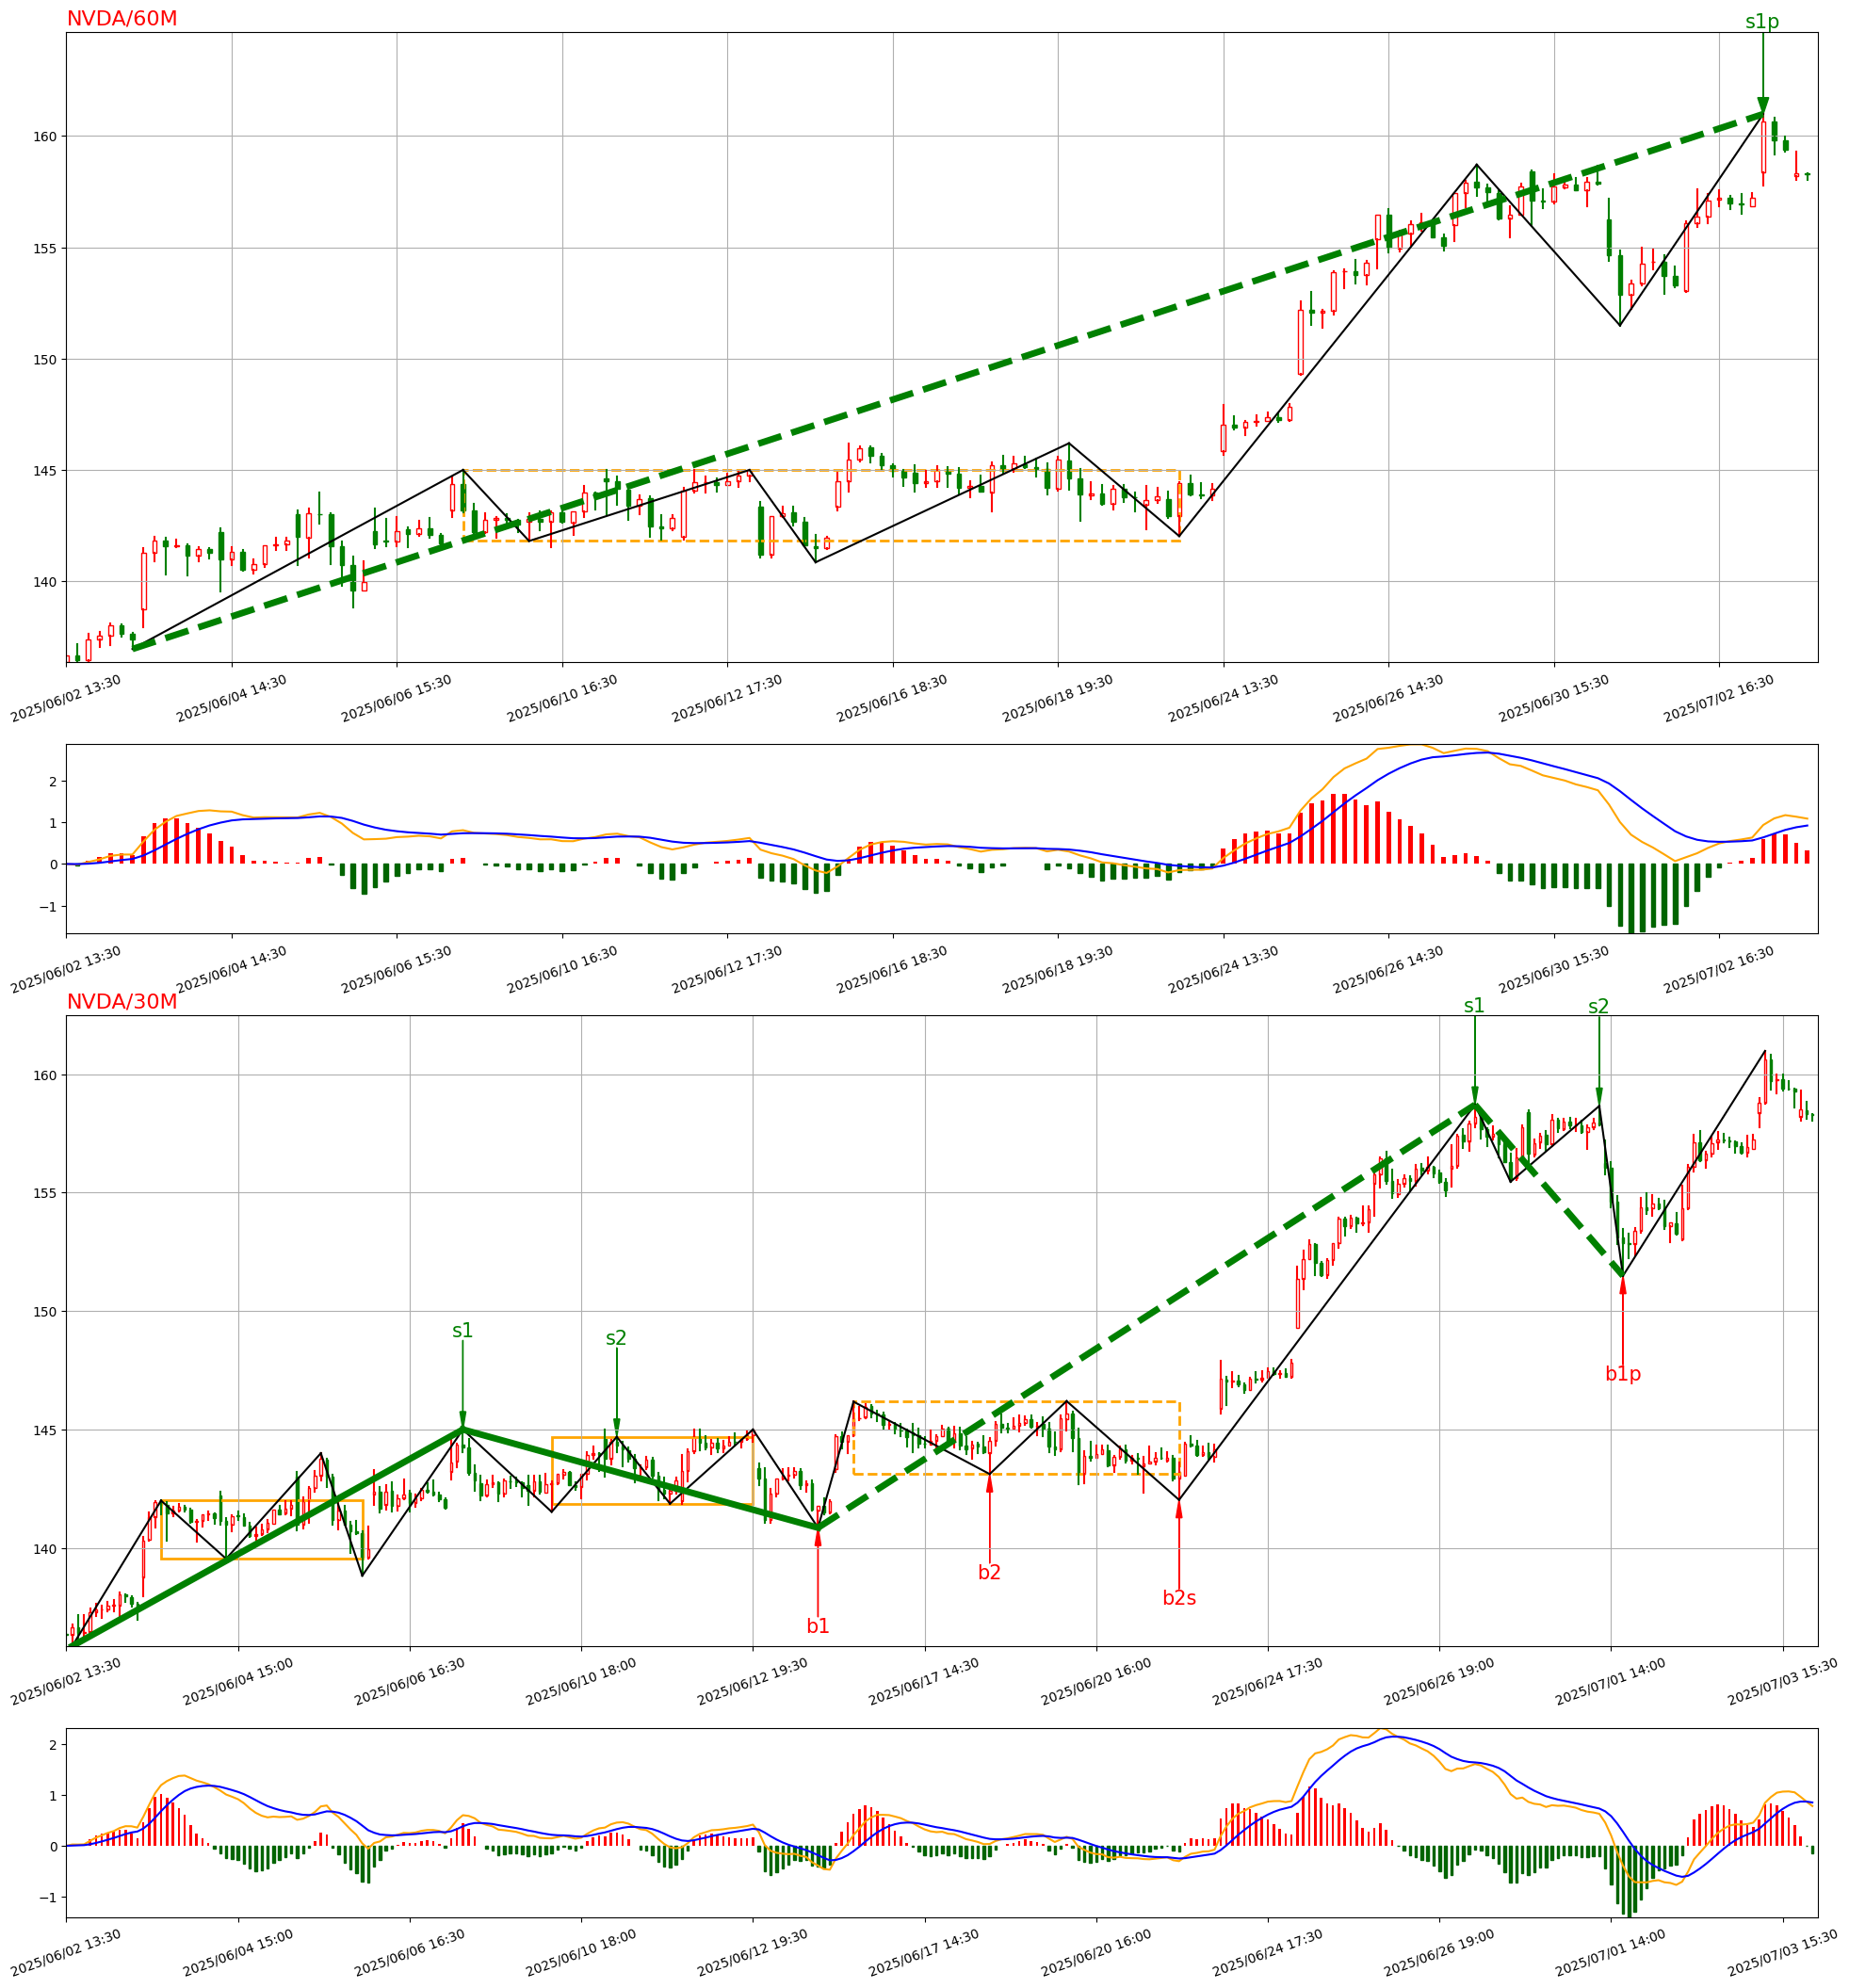

In [12]:
chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

# plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
# plot_driver.save2img("./NVDA5m.png")
# plot_driver.figure.show()

from Plot.AnimatePlotDriver import CAnimateDriver
anim = CAnimateDriver(chan, plot_config=plot_config, plot_para=plot_para)
#anim.figure.show()

c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

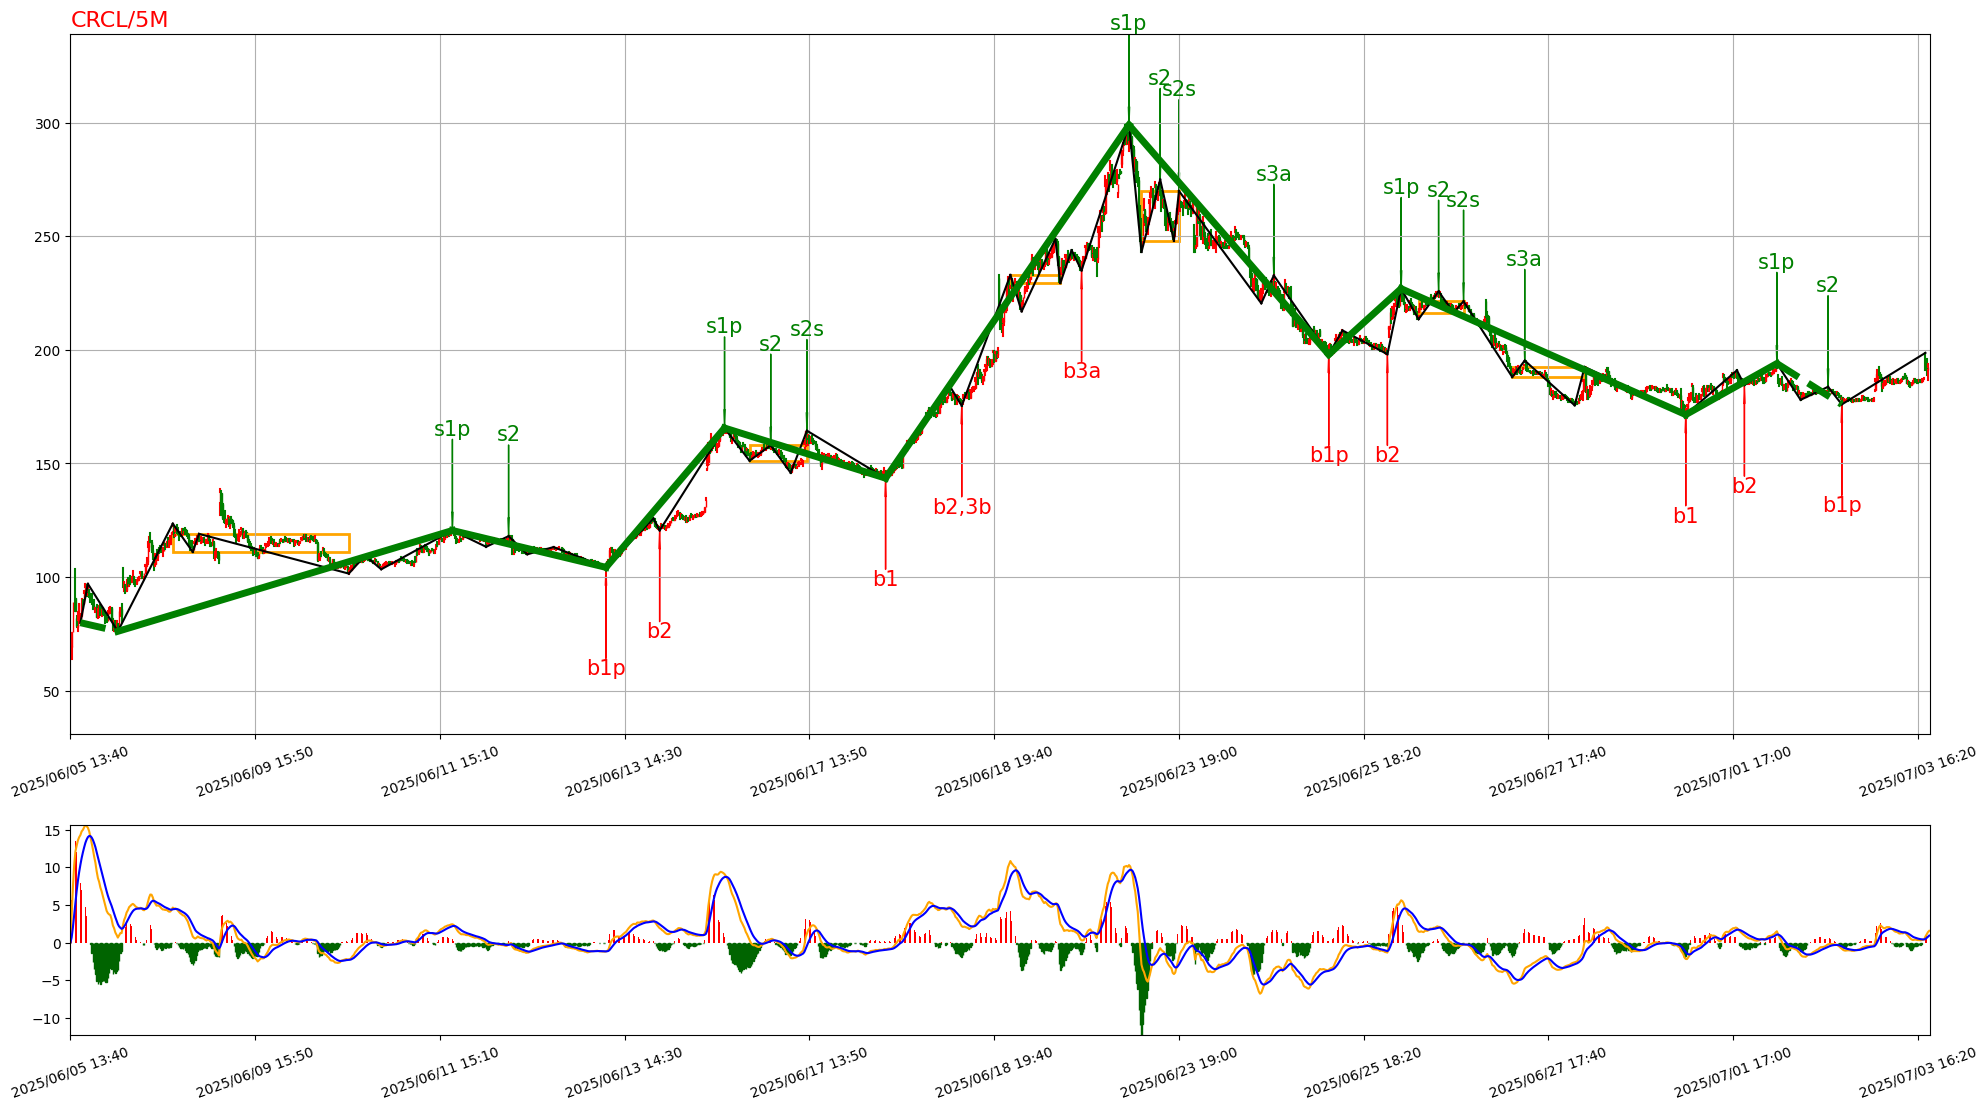

In [6]:
code = "CRCL"
#begin_time = "2024-09-25"
begin_time = "2025-06-04"
#end_time = "2025-04-01"
end_time = None
data_src = DATA_SRC.YAHOO_FINANCE
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_5M]

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": True,
    "min_zs_cnt": 0,
    "bs1_peak": True,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

# lv = chan.lv_list[0]  # 最低级别，比如 KL_TYPE.K_60M
# klu_list = chan[lv].lst  # 或者 chan[0].klu_list
# print("K线数量：", len(klu_list))
# print("前10个K线收盘价：", [klu.close for klu in klu_list[:10]])
# TRIGGER STEP = TRUE



plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
plot_driver.save2img("./NVDA5m.png")
plot_driver.figure.show()


In [ ]:
code = "^IXIC"
#begin_time = "2024-09-25"
begin_time = "2025-06-01"
#end_time = "2025-04-01"
end_time = None
data_src = DATA_SRC.YAHOO_FINANCE
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_1M]

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

# plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
# plot_driver.save2img("./NVDA5m.png")
# plot_driver.figure.show()

from Plot.AnimatePlotDriver import CAnimateDriver
anim = CAnimateDriver(chan, plot_config=plot_config, plot_para=plot_para)
#anim.figure.show()

In [ ]:
from utils.export_bs_features import export_bs_feature_files_by_type
export_bs_feature_files_by_type(chan, KL_TYPE.K_60M, "./output/NVDA_60m_bs_types")


In [4]:
from utils.export_bs_features import export_bs_feature_files_by_type
from Chan import CChan
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
import pandas as pd
from ChanConfig import CChanConfig
import yfinance as yf
import os

# === Example ticker lists ===
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"].tolist()
nasdaq100 = yf.Tickers(" ".join([
    "AAPL MSFT NVDA AMD GOOGL AMZN TSLA META NFLX INTC AVGO QCOM TXN MU ADI ORCL IBM"
])).tickers.keys()
dowjones = ["AAPL", "MSFT", "V", "UNH", "JNJ", "WMT", "JPM", "HD", "PG"]

def fix_symbol(sym):
    return sym.replace(".", "-")
# === Unified + deduplicated ===
tickers = sorted(set(sp500 + list(nasdaq100) + dowjones))
tickers = [fix_symbol(ticker) for ticker in tickers]
begin_time = "2025-05-09"
end_time = None
lv_list = [KL_TYPE.K_30M]
lv = KL_TYPE.K_30M
data_src = DATA_SRC.YAHOO_FINANCE
autype = AUTYPE.QFQ

# === 配置参数 ===
config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

# === 输出主目录 ===
#main_output_dir = "./output/yfinance_day_bs_by_type"
main_output_dir = "./output/yfinance_30m_bs_by_type_07/7"
os.makedirs(main_output_dir, exist_ok=True)

# === 批量处理 ===
for code in tickers:
    try:
        print(f"\n[⏳] Processing: {code}")
        chan = CChan(
            code=code,
            begin_time=begin_time,
            end_time=end_time,
            data_src=data_src,
            lv_list=lv_list,
            config=config,
            autype=autype
        )

        output_dir = os.path.join(main_output_dir, f"{code}")
        export_bs_feature_files_by_type(chan, lv, output_dir)

    except Exception as e:
        print(f"[❌] Error processing {code}: {e}")





[⏳] Processing: A
[✓] Exported 2 '1p' BS points to: ./output/yfinance_30m_bs_by_type_07/7\A\bs_features_type_1p.csv
[✓] Exported 4 '2' BS points to: ./output/yfinance_30m_bs_by_type_07/7\A\bs_features_type_2.csv
[✓] Exported 3 '2s' BS points to: ./output/yfinance_30m_bs_by_type_07/7\A\bs_features_type_2s.csv
[✓] Exported 3 '1' BS points to: ./output/yfinance_30m_bs_by_type_07/7\A\bs_features_type_1.csv
[✓] Exported 1 '3b' BS points to: ./output/yfinance_30m_bs_by_type_07/7\A\bs_features_type_3b.csv

[⏳] Processing: AAPL
[✓] Exported 2 '1' BS points to: ./output/yfinance_30m_bs_by_type_07/7\AAPL\bs_features_type_1.csv
[✓] Exported 1 '2' BS points to: ./output/yfinance_30m_bs_by_type_07/7\AAPL\bs_features_type_2.csv
[✓] Exported 1 '2s' BS points to: ./output/yfinance_30m_bs_by_type_07/7\AAPL\bs_features_type_2s.csv

[⏳] Processing: ABBV
[✓] Exported 3 '1p' BS points to: ./output/yfinance_30m_bs_by_type_07/7\ABBV\bs_features_type_1p.csv
[✓] Exported 3 '2' BS points to: ./output/yfinance_